# This notebook produces meaningful plots of the MC true information to monitor MC production 

In [1]:
%matplotlib inline

import os
import sys

import numpy             as np
import tables            as tb
import matplotlib.pyplot as plt
import pandas            as pd

from invisible_cities.io.mchits_io           import load_mchits
from invisible_cities.io.mchits_io           import load_mcparticles

from invisible_cities.database               import load_db

from invisible_cities.icaro.hst_functions    import hist
from invisible_cities.icaro.hst_functions    import hist2d
from invisible_cities.icaro.hst_functions    import hist2d_profile
from invisible_cities.icaro.hst_functions    import labels

from invisible_cities.core.system_of_units_c import units

In [4]:
DetGeo = load_db.DetectorGeo()

In [28]:
energies = []
Xorigin = []
Yorigin = []
Zorigin = []
partE = []
numpart = []
for number in range(0,1):
    for p in range(0,1):

        PATH_IN = "/path/to/data/dst_NEXT_v1_00_05_Tl_ACTIVE_{0}_{1}_7bar_PMP_10000.h5".format(number, p)
        print('Analyzing file {}'.format(PATH_IN))
        try:
            load_mchits(PATH_IN)
        except ValueError:
            continue
        except OSError:
            continue
        hit_dict = load_mchits(file_name)
        for _, hits in hit_dict.items():
            e = 0.
            for hit in hits:
                # Check that only the hits of the ACTIVE volume are considered
                if hit.pos[2] < DetGeo.ZMAX[0] and hit.pos[0] < DetGeo.XMAX[0] and hit.pos[0] > DetGeo.XMIN[0]:
                    e += hit.E
                    Xorigin.append(hit.pos[0])  
                    Yorigin.append(hit.pos[1])  
                    Zorigin.append(hit.pos[2]) 
            energies.append(e)
        particle_dict = load_mcparticles(PATH_IN)
        
        for ide, particles in particle_dict.items():
            numpart.append(len(particles))
            for _, p in particles.items():
                partE.append(p.E)

Analyzing file /Users/paola/Software/ic_data/TlMC/dst_NEXT_v1_00_05_Tl_ACTIVE_0_0_7bar_PMP_10000.h5


## Total energy of events

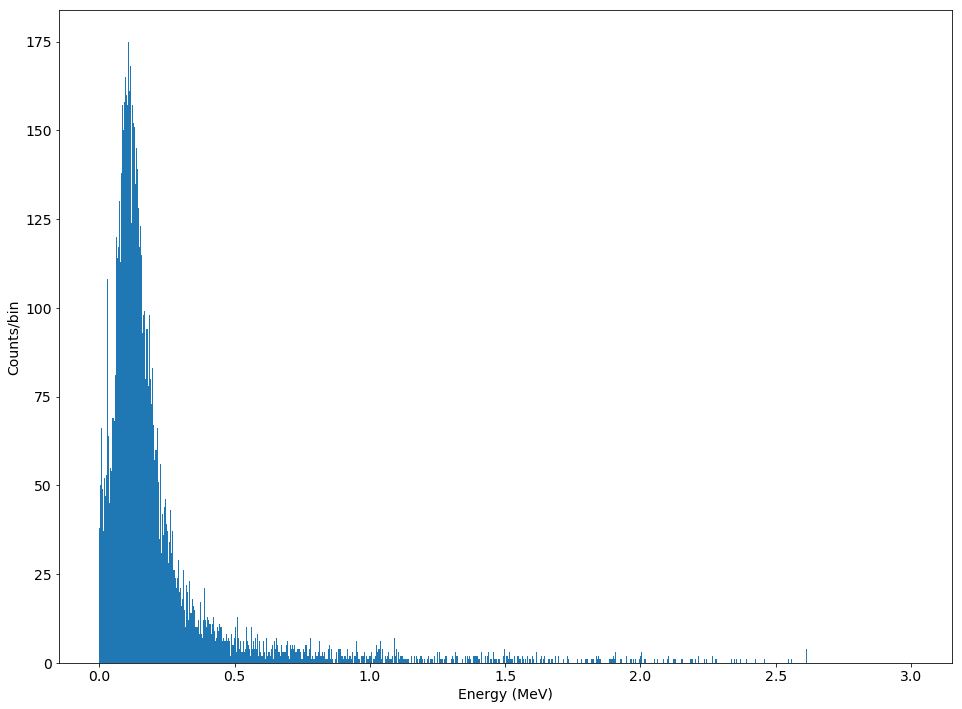

In [30]:
fig = plt.figure();
fig.set_figwidth(16.0)
fig.set_figheight(12.0)
plt.hist(energies, bins=1000, range=((0.,3)), label='Event energy')
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts/bin')

## XY position of hits

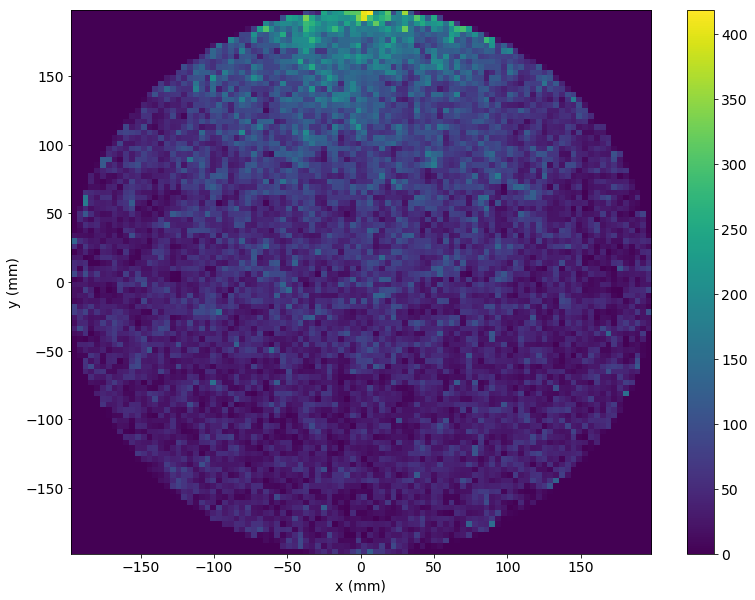

In [21]:
fig = plt.figure();
ax1 = fig.add_subplot(111);
fig.set_figheight(10.0)
fig.set_figwidth(13.0)

plt.hist2d(Xorigin,Yorigin, bins=100)
plt.colorbar()
        
plt.xlabel("x (mm)");
plt.ylabel("y (mm)");

## XZ position of hits 

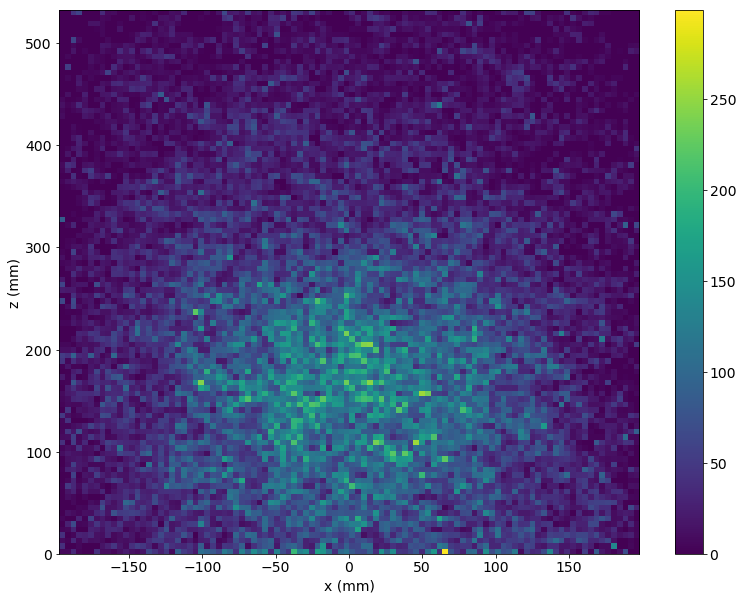

In [22]:
fig = plt.figure();
ax1 = fig.add_subplot(111);
fig.set_figheight(10.0)
fig.set_figwidth(13.0)

plt.hist2d(Xorigin,Zorigin, bins=100)
plt.colorbar()
        
plt.xlabel("x (mm)");
plt.ylabel("z (mm)");

## Number of particles per event

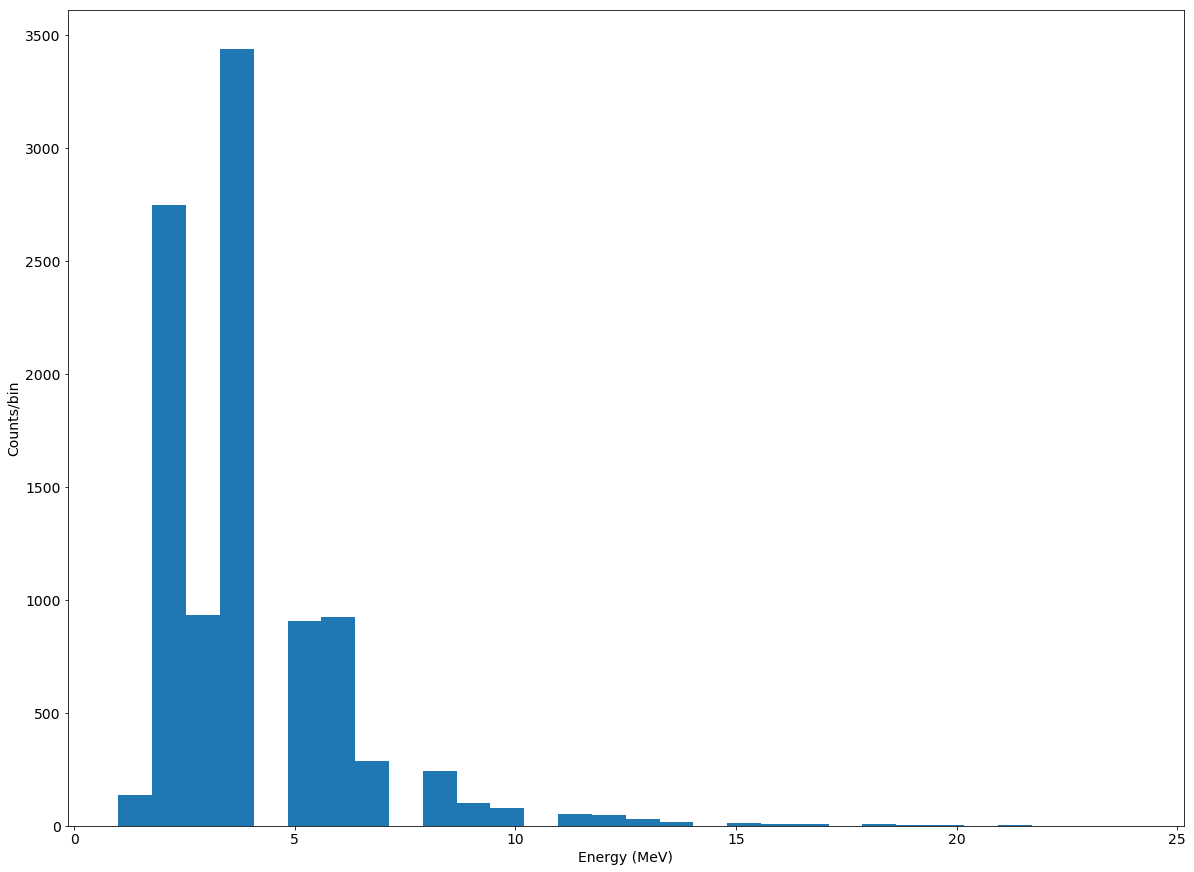

In [32]:
plt.hist(numpart, bins=30, label='Number of particles')
plt.xlabel('Number of particles in one event')
plt.ylabel('Counts/bin')